# Homework 7
***

**Name**: HARISH NANDHAN SHANMUGAM

***

This assignment is due on Gradescope by **Friday April 11 at 5:00PM**. If you submit the assignment  by this deadline, you will receive 2 bonus points. If you need a little extra time, you may submit your work by **Monday April 14 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There are 3 total questions on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

### Problem 1

Let $Y_1,...,Y_n \overset{i}{\sim} Poisson(\lambda_i)$. Show that, if $\eta_i = \beta_0$, then the maximum likelihood estimator of $\lambda_i$ is $\widehat\lambda_i = \bar{Y}$, for all $i=1,...,n$.

$$
\text{Given,} \quad Y_1, \ldots, Y_n \overset{i.i.d.}{\sim} \text{Poisson}(\lambda_i)
$$

$$
\text{As} \quad \eta_i = \beta_0, \quad \lambda_i = e^{\eta_i} = e^{\beta_0} \quad \text{for all } i
$$

$$
\text{Thus,} \quad \lambda_1 = \lambda_2 = \lambda_3 = \cdots = \lambda_n = \lambda
$$

$$
\text{The joint likelihood function for } Y_1, \ldots, Y_n \text{ is:}
$$

$$
L(\lambda) = \prod_{i=1}^n \frac{e^{-\lambda} \lambda^{y_i}}{y_i!}
$$

$$
= e^{-n\lambda} \lambda^{\sum_{i=1}^n y_i} \prod_{i=1}^n \frac{1}{y_i!}
$$

$$
\text{Log-likelihood function:}
$$

$$
l(\lambda) = -n\lambda + \left( \sum_{i=1}^n y_i \right) \log \lambda - \sum_{i=1}^n \log (y_i!)
$$

$$
\text{Diff. wrt } \lambda \text{ find the MLE:}
$$

$$
\frac{d l(\lambda)}{d\lambda} = -n + \frac{1}{\lambda} \sum_{i=1}^n y_i
$$

$$
\text{Equating to zero:}
$$

$$
-n + \frac{1}{\lambda} \sum_{i=1}^n y_i = 0
$$

$$
\sum_{i=1}^n y_i = \lambda n
$$

$$
\lambda = \frac{1}{n} \sum_{i=1}^n y_i
$$

$$
\text{MLE, }
\hat \lambda = \bar{Y}
$$

$$
\text{We know that, for all } i, \quad \lambda_i = \lambda
$$

$$
\text{Hence, } \hat \lambda_i = \bar{Y}
$$


---
### Problem 2 - Generalized Linear Models: Logistic Regression

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study of 768 adult female Pima Indians living near Phoenix, AZ. The purpose of the study was the investigate factors related to diabetes.

*Before we analyze these data, we should note that some have raised ethical issues with its collection and popularity in the statistics and data science community. We should think seriously about these concerns. For example, Maya Iskandarani wrote a brief [piece](https://researchblog.duke.edu/2016/10/24/diabetes-and-privacy-meet-big-data/) on consent and privacy concerns raised by this dataset. After you familarize yourself with the data, we'll then turn to these ethical concerns.*


**PART A:** Perform simple graphical and numerical summaries of the data. Can you find any obvious irregularities in the data? If so, take appropriate steps to correct these problems. Hints given in cell comments below.

In [ ]:
library(ggplot2)
library(dplyr)
#Here's a description of the data: https://rdrr.io/cran/faraway/man/pima.html
pima = read.csv("pima.csv")
head(pima)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


[1] FALSE

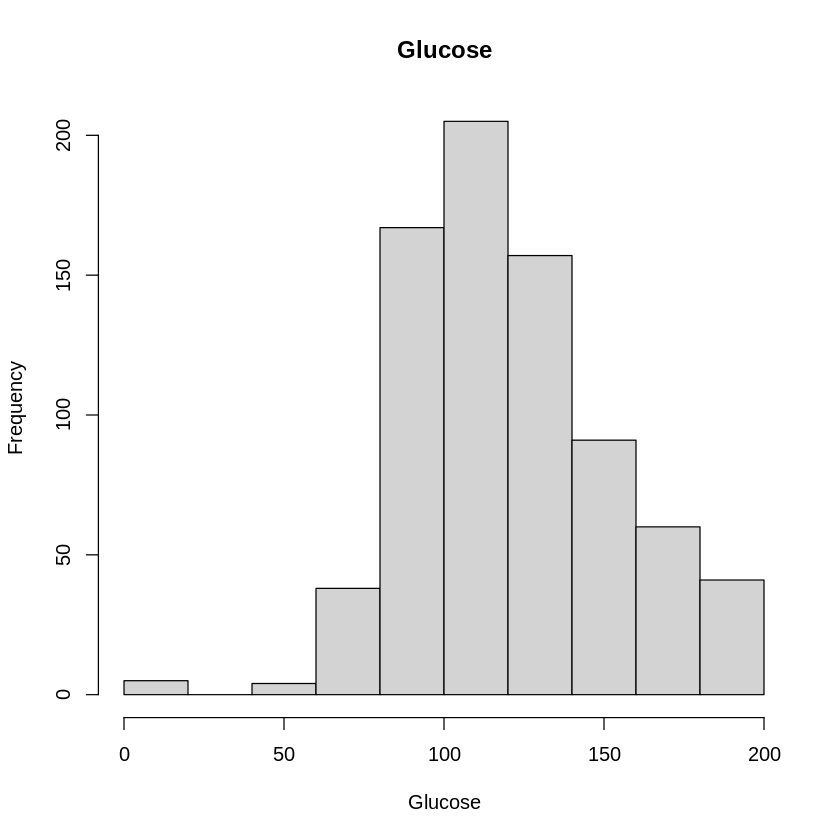

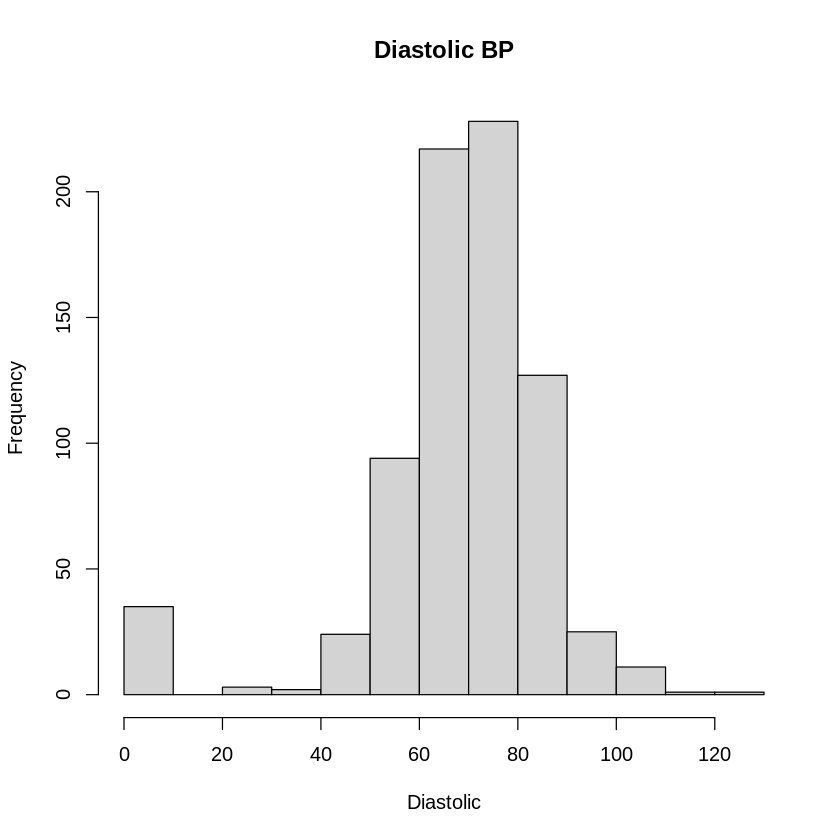

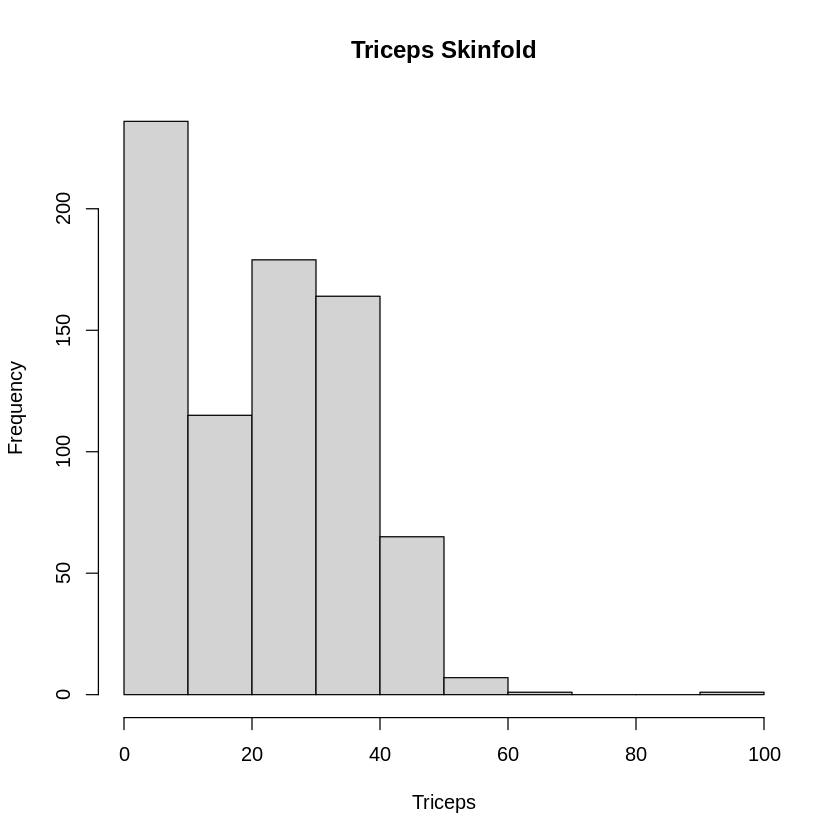

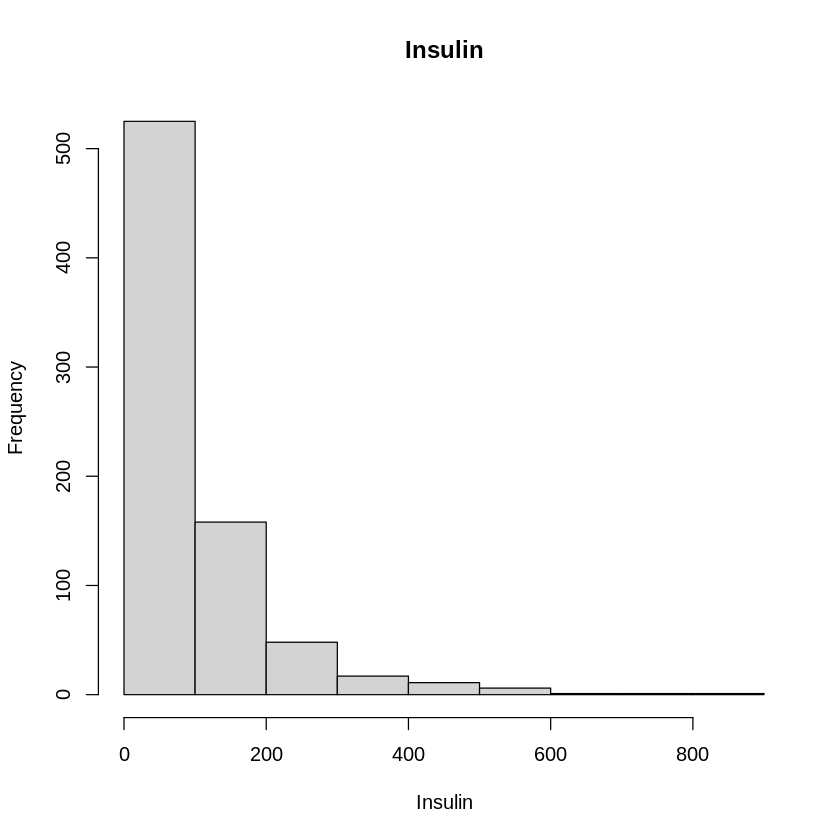

    pregnant         glucose        diastolic         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            bmi           diabetes           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.

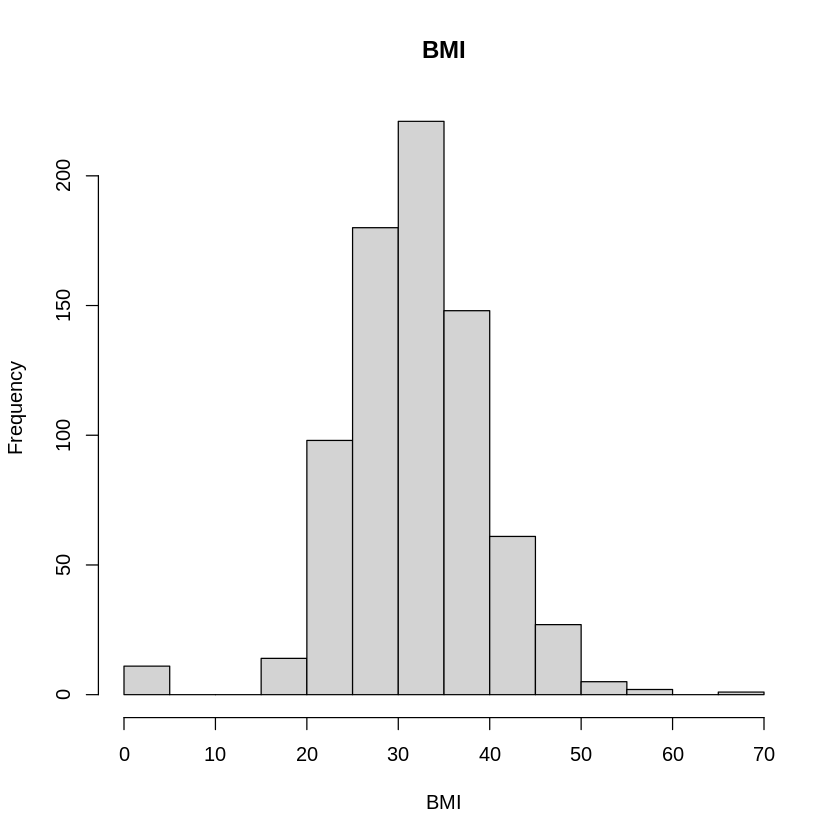

In [ ]:
# check to see if there are missing values
any(is.na(pima))
# note how the histograms show weirdness -- glucose, diastolic, triceps,
# BMI, and insulin should never be zero
hist(pima$glucose, main = "Glucose", xlab = "Glucose")
hist(pima$diastolic, main = "Diastolic BP", xlab = "Diastolic")
hist(pima$triceps, main = "Triceps Skinfold", xlab = "Triceps")
hist(pima$insulin, main = "Insulin", xlab = "Insulin")
hist(pima$bmi, main = "BMI", xlab = "BMI")
# recode zeros to NAs for values that can't be zero
recode_cols <- c("glucose", "diastolic", "triceps", "insulin", "bmi")
pima[recode_cols] <- lapply(pima[recode_cols], function(x) ifelse(x == 0, NA, x))

# Print the summary of the edited data frame to verify that you have made the change
# above.
summary(pima)

- There are some obvious irregularities in data such as "glucose", "diastolic", "triceps","BMI" and "insulin" has the zero values, but it should not be zero. So what I did is, Replaced all the zero values with "NA".
- Then from the summary we can see that "Glucose","Diastolic","Triceps","BMI" and "Insulin" which has the zero values are replaced by "NA".


**PART B:** Fit a model with the result of the diabetes `test` as the response and all the other variables as predictors. Store this model as  `glmod_pima`.

In [ ]:
glmod_pima = glm(test~.,data=pima,family=binomial)
summary(glmod_pima)


Call:
glm(formula = test ~ ., family = binomial, data = pima)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.004e+01  1.218e+00  -8.246  < 2e-16 ***
pregnant     8.216e-02  5.543e-02   1.482  0.13825    
glucose      3.827e-02  5.768e-03   6.635 3.24e-11 ***
diastolic   -1.420e-03  1.183e-02  -0.120  0.90446    
triceps      1.122e-02  1.708e-02   0.657  0.51128    
insulin     -8.253e-04  1.306e-03  -0.632  0.52757    
bmi          7.054e-02  2.734e-02   2.580  0.00989 ** 
diabetes     1.141e+00  4.274e-01   2.669  0.00760 ** 
age          3.395e-02  1.838e-02   1.847  0.06474 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 344.02  on 383  degrees of freedom
  (376 observations deleted due to missingness)
AIC: 362.02

Number of Fisher Scoring iterations: 5


**PART C:** Using the model above, write R code to calculate the odds ratio of testing positive for diabetes for a woman with a BMI at the first quartile compared with a woman at the third quartile, assuming all other factors are held constant. Store your answer in a  variable `x`. Give an interpretation of this value.

$$e ^{\beta_{bmi}*({Q3-Q1})}$$

In [ ]:

bmi_q1 = quantile(pima$bmi, 0.25, na.rm = TRUE)
bmi_q3 = quantile(pima$bmi, 0.75, na.rm = TRUE)
beta_bmi = coef(glmod_pima)["bmi"]
x = exp(beta_bmi * (bmi_q3 - bmi_q1))
x



bmi 
1.900072

 The ODDs ratio of testing positive for diabetes for a woman with a BMI at the first quartile is 1.9x more compared with a woman who tested positive for diabetes with a BMI at the third quartile

**PART D:** <span style="color: #CFB87C;">(STAT 5010 Students Only)</span>  Do women who test positive for diabetes have higher diastolic blood pressures? Is the diastolic blood pressure significant in the regression model? Explain the distinction between the two questions and discuss why the answers are only apparently contradictory.

In [ ]:
pima %>%
  group_by(test) %>%
  summarize(mean_diastolic = mean(diastolic, na.rm = TRUE))
# confint(glmod_pima)

test,mean_diastolic
<dbl>,<dbl>
0,70.87734
1,75.32143


It is true that the women tested positive for Diabetes have higher diastolic BP. From the model summary, we can also confirm that p value for diastolic blood pressure is 0.9 so that feature won't have a significant contribution for the regression model.

The distinction b/w the two questions and why the answers are only apparently contradictory are:

- in the first question it is a descriptive study, the diastolic blood pressure of women with diabetes and those without the disease is compared, and the raw group averages are examined without modifying the other factors.

- in the question 2, When other indicators are present, it is inferential to determine if diastolic blood pressure can predict diabetes on its own.

The answers looks contradictory since first one is Descriptive and second is Inferential.
Hence, Although the diastolic blood pressure variable in this instance may indicate a group-level difference, it may not be significant in a multivariate setting.

**PART E:** Ethical Issues in Data Collection

Read Maya Iskandarani's [piece](https://researchblog.duke.edu/2016/10/24/diabetes-and-privacy-meet-big-data/) on consent and privacy concerns raised by this dataset. Summarize those concerns here. I'm expecting a few sentences or a paragraph or two.

- In "Diabetes and Privacy Meet Big Data," Maya discusses important privacy and consent concerns related to the usage of the Pima Indians Diabetes dataset. Although this dataset is extensively utilized for statistics and machine learning, Maya warns that neither the Pima Indian community nor the medical experts who handled their data were aware of how medical data will be misused and made public for study and entertainment.

- It is also important to observe that no consent is obtained for any secondary use.  Data is being used for algorithm and development testing, even though it was first suggested that it would only be gathered for health-related studies.  It's true that occasionally this occurs without the community's knowledge or approval, but this causes ethical concerns about respect for these Indigenous communities, data ownership, and the necessity of open data governance.

---
### Problem 3 - Poisson regression

The ships dataset gives the number of damage incidents and aggregate months of service for different types of ships broken down by year of construction and period of operation.

The code below splits the data into a training set (80% of the data) and a test set (the remaining 20%).

In [ ]:
library(MASS)
data(ships)
ships = ships[ships$service != 0,]
ships$year = as.factor(ships$year)
ships$period = as.factor(ships$period)

set.seed(11)
n = floor(0.8 * nrow(ships))
index = sample(seq_len(nrow(ships)), size = n)

train = ships[index, ]
test = ships[-index, ]
head(train)
summary(train)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




,type,year,period,service,incidents
,<fct>,<fct>,<fct>,<int>,<int>
40,E,75,75,542,1
28,D,65,75,192,0
18,C,60,75,552,1
19,C,65,60,781,0
5,A,70,60,1512,6
32,D,75,75,2051,4


 type  year   period     service          incidents    
 A:5   60:7   60:11   Min.   :   45.0   Min.   : 0.00  
 B:5   65:8   75:16   1st Qu.:  318.5   1st Qu.: 0.50  
 C:6   70:8           Median : 1095.0   Median : 2.00  
 D:7   75:4           Mean   : 5012.2   Mean   :10.63  
 E:4                  3rd Qu.: 2202.5   3rd Qu.:11.50  
                      Max.   :44882.0   Max.   :58.00  

**PART A:** Use the training set to develop an appropriate regression model for `incidents`, using `type`, `period`, and `year` as predictors (HINT: is this a count model or a rate model?). Calculate the mean squared prediction error (MSPE) for the test set. Display your results.

In [ ]:
glm_mod_pois = glm(incidents ~ type + period + year, data = train, family = poisson)
summary(glm_mod_pois)



Call:
glm(formula = incidents ~ type + period + year, family = poisson, 
    data = train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5644     0.2199   7.113 1.13e-12 ***
typeB         1.6795     0.1889   8.889  < 2e-16 ***
typeC        -2.0789     0.4408  -4.717 2.40e-06 ***
typeD        -1.1551     0.2930  -3.943 8.06e-05 ***
typeE        -0.5113     0.2781  -1.839   0.0660 .  
period75      0.4123     0.1282   3.216   0.0013 ** 
year65        0.4379     0.1885   2.324   0.0201 *  
year70        0.2260     0.1916   1.180   0.2382    
year75        0.1436     0.3147   0.456   0.6481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 109.21  on 18  degrees of freedom
AIC: 200.92

Number of Fisher Scoring iterations: 6


In [ ]:
pred = predict(glm_mod_pois,test, type = 'response')
true_val = test$incidents

MSPE = mean((true_val - pred)^2)
MSPE

[1] 131.0776

Here the model fitting is done with  type, period, year and the family used here is 'poisson reg'. MSPE is used in checking the error with the testing set, to check how the model is performing with unseen data.

**PART B:** Do we really need all of these predictors? Construct a new regression model leaving out `year` and calculate the MSPE for this second model. Decide which model is better. Explain why you chose the model that you did.

In [ ]:
glm_mod_pois1 = glm(incidents ~ type + period, data = train, family = poisson)
summary(glm_mod_pois1)
pred = predict(glm_mod_pois1,test,type = 'response')
true_val = test$incidents
MSPE = mean((true_val - pred)^2)
MSPE


Call:
glm(formula = incidents ~ type + period, family = poisson, data = train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7190     0.1838   9.355  < 2e-16 ***
typeB         1.7831     0.1781  10.014  < 2e-16 ***
typeC        -2.0573     0.4394  -4.683 2.83e-06 ***
typeD        -1.1281     0.2918  -3.866 0.000111 ***
typeE        -0.4831     0.2767  -1.746 0.080787 .  
period75      0.4723     0.1222   3.865 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 115.63  on 21  degrees of freedom
AIC: 201.34

Number of Fisher Scoring iterations: 6


[1] 275.1226

- The model with three features type, period and year is better here because it has the low MSPE value. If we remove the 'year' feature then the MSPE goes from 131 to 275
- Residual Deviance of second model is high compared to the first one which tells that some predictors even though when their individual contribution is not there but it will induce the prediction when combined with other features. So it's better to go with full model with the feature 'year'.



**PART C:** Compute the AIC and BIC for both models. Which model is best according to these metrics? Does each select a different model?

In [ ]:
AIC_pois = AIC(glm_mod_pois)
BIC_pois = BIC(glm_mod_pois)

AIC_pois
BIC_pois

[1] 200.919

[1] 212.5815

In [ ]:
AIC_pois1 = AIC(glm_mod_pois1)
BIC_pois1 = BIC(glm_mod_pois1)

AIC_pois1
BIC_pois1

[1] 201.3378

[1] 209.1128

AIC score of model 1 is lower compared to AIC of model 2. BIC score of model 2 is lower compared to BIC. Both the metrics choose a different model, If prediction is our end goal then we'll go with AIC. If explanation is our end goal we can go with BIC.

How do we determine if our model is explaining anything? With linear regression, we had a F-test, but we can't do that for Poisson Regression. If we want to check if our model is better than the null model, then we're going to have to check directly. In particular, we need to compare the deviances of the models to see if they're significantly different.

**PART D:** <span style="color: #CFB87C;">(STAT 5010 Students Only)</span> Conduct a $\chi^2$ test (using the deviance). Let $\alpha = 0.05$:

- Test the adequacy of the model from PART A against the saturated model (the model fit to all predictors).

**What conclusions should you draw from this test?**

In [ ]:
glm_mod_full = glm(incidents ~ ., data = train, family=poisson)
glm_mod_red = glm(incidents ~ type+period+year, data = train, family=poisson)
anova(glm_mod_red,glm_mod_full,test ="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18,109.21228,NA,NA,NA
2,17,27.82257,1,81.3897,1.853209e-19


- H0: Reduced model is sufficient
- H1: Reduced model is not sufficient

- The p-value is < 0.05, so we have to reject H0 and reduced model is not sufficient.
We need all the features (full model) for better model prediction.
